# <p style="text-align: center;">WEEK - 6</p>
#### Aim : 
Write a program to perform Dimensionality Reduction using Principle
Component Analysis techniques on real time datasets.

## Description :

### Principle Component Analysis :
As the number of features or dimensions in a dataset increases, the amount of data required to obtain a statistically significant result increases
exponentially. This can lead to issues such as overfitting, increased
computation time, and reduced accuracy of machine learning models this is
known as the curse of dimensionality problems that arise while working with
high-dimensional data. <br >
    To address the curse of dimensionality, Feature Engineering techniques
are used which include feature selection and feature extraction. Dimensionality
Reduction is a type of feature extraction technique that aims to reduce the
number of input features while retaining as much of the original information as
possible. <br>
    One of the most popular dimensionality reduction technique is Principal Component Analysis(PCA). <br>
1) PCA comes under the Unsupervised Machine Learning category.
2) Reducing the number of variables in a data collection while retaining as
much information as feasible is the main goal of PCA. PCA can be mainly
used for Dimensionality Reduction and also for important feature selection.
3) Correlated features to Independent features.

### Implementation :
#### Importing Modules :

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Load the Dataset :
#### Program :

In [20]:
data = pd.read_csv('assets/Housing.csv')
print(data.head())
data.info()

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

### Select relevant features for Analysis :
#### Program :

In [21]:
data = data[['price', 'area', 'bedrooms', 'bathrooms', 'stories']].dropna()
print(data)

        price  area  bedrooms  bathrooms  stories
0    13300000  7420         4          2        3
1    12250000  8960         4          4        4
2    12250000  9960         3          2        2
3    12215000  7500         4          2        2
4    11410000  7420         4          1        2
..        ...   ...       ...        ...      ...
540   1820000  3000         2          1        1
541   1767150  2400         3          1        1
542   1750000  3620         2          1        1
543   1750000  2910         3          1        1
544   1750000  3850         3          1        2

[545 rows x 5 columns]


### Standardize the Data :
#### Program :

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### Apply PCA :
#### Program :

In [23]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)
principal_components

array([[ 4.30090964,  0.17279876, -2.32147132],
       [ 4.34425725, -0.16208169, -1.48112098],
       [ 3.9925894 , -1.54334221, -1.62357859],
       ...,
       [-2.09116509, -0.55503314,  0.36940937],
       [-1.66086869,  0.75330177,  0.59180263],
       [-1.40600375,  0.51692219,  0.85090441]])

### BarPlot

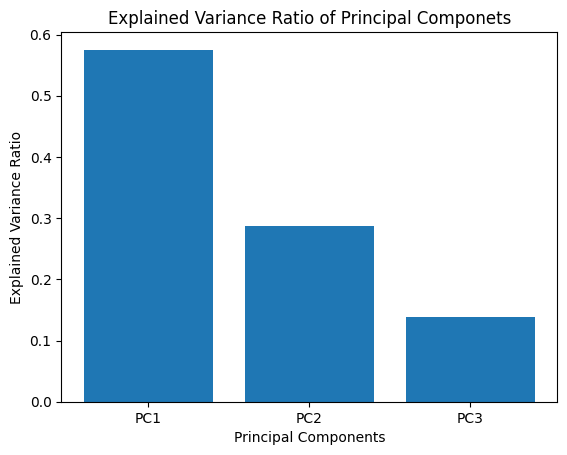

In [68]:
explained_variance = pca.explained_variance_ratio_
plt.bar(['PC1','PC2', 'PC3'],explained_variance)
plt.xlabel('Principal Components')
plt.ylabel("Explained Variance Ratio")
plt.title('Explained Variance Ratio of Principal Componets')
plt.show()

In [69]:
pc_df = pd.DataFrame(principal_components)
# data_with_pc = pd.concat([pc_df], axis = 1)
# print(data_with_pc.head())
pc_df

,0,1,2
0,4.300910,0.172799,-2.321471
1,4.344257,-0.162082,-1.481121
2,3.992589,-1.543342,-1.623579
3,3.935930,0.206807,-1.869694
4,3.627355,0.267082,-1.572915
...,...,...,...
540,-2.234321,-0.402615,0.170788
541,-1.793035,0.880695,0.444434
542,-2.091165,-0.555033,0.369409
543,-1.660869,0.753302,0.591803


### Correlations

<Axes: >

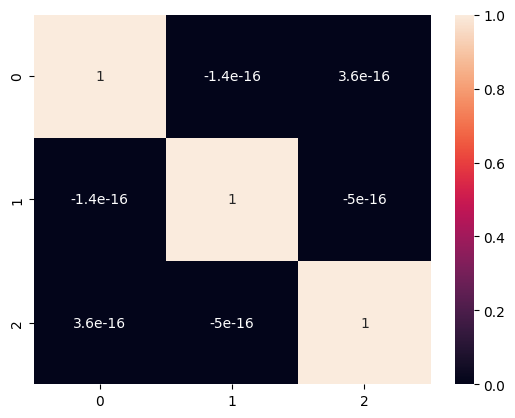

In [70]:
import seaborn as sns 
sns.heatmap(pc_df.corr(), annot = True)

### Create DataFrame :
#### Program :

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the dataset
pc_df = pd.read_csv('assets/Housing.csv').dropna()

# Features and target variable
X = pc_df[['bathrooms', 'bedrooms', 'stories']]
y = pc_df['basement']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


### Train a Random Forest classifier

In [71]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=50)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=50)

### Evaluate model performance

In [72]:
# train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = rf_classifier.score(X_test, y_test)

# print("Train Accuracy:", train_accuracy*100)
print("Test Accuracy:", test_accuracy*100)

Test Accuracy: 74.31192660550458


### Make predictions

In [73]:
y_pred = rf_classifier.predict(X_test)

### Compute confusion matrix

In [74]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[73,  1],
       [27,  8]], dtype=int64)

### Plot confusion matrix

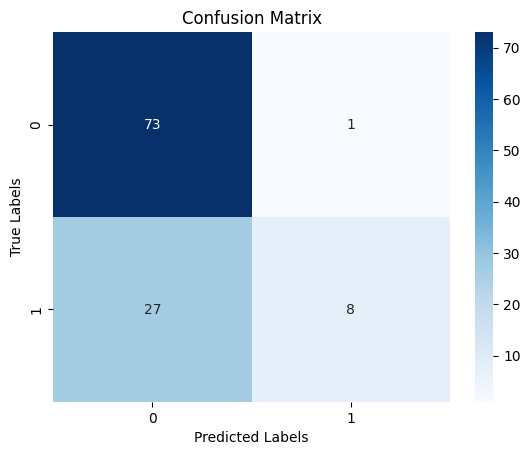

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Calculate and visualize covariance matrix

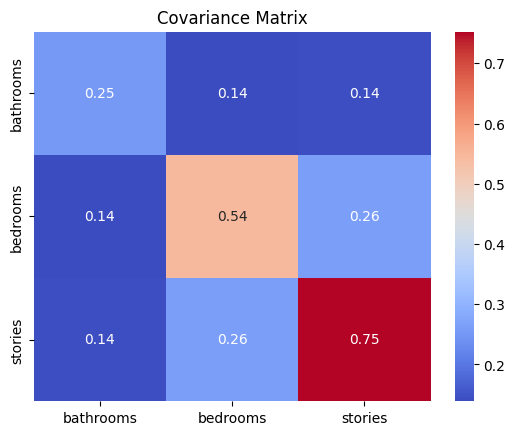

In [63]:
cov_matrix = X.cov()
# plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2g')
plt.title('Covariance Matrix')
plt.show()